In [ ]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.metrics.pairwise import cosine_similarity


import pandas as pda

import json

import networkx as nx
from networkx.algorithms.similarity import graph_edit_distance,optimize_graph_edit_distance

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Graph2Vec for Generating Embeddings**

In [ ]:
#!git clone https://github.com/benedekrozemberczki/graph2vec

In [ ]:
import os
os.makedirs('graph2vec/features')

In [ ]:
%cd graph2vec

/content/graph2vec


In [ ]:
!python /content/gdrive/MyDrive/capstone-project/graph2vec/graph2vec.py --input-path /content/gdrive/MyDrive/capstone-project/graph2vec_jsonfiles/ --output-path features/embeddings.csv


Feature extraction started.

100% 7/7 [00:00<00:00, 110.34it/s]

Optimization started.

/content/gdrive/MyDrive/capstone-project/graph2vec/graph2vec.py:104: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  out.append([identifier] + list(model.docvecs["g_"+identifier]))


**Embeddings for each network type**

In [ ]:
import pandas as pd

embeddings_df=pd.read_csv("features/embeddings.csv")
embeddings_df

,type,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,x_118,x_119,x_120,x_121,x_122,x_123,x_124,x_125,x_126,x_127
0,nf_ToN_iot_v1,-1.262755,-1.692751,-2.469743,2.368135,1.055262,0.437188,-2.634822,-1.387983,-2.649029,...,1.116481,2.326316,2.445653,1.355691,-1.902282,2.341292,-2.983030,0.119191,-2.124245,0.086536
1,nf_ToN_iot_v2,-0.655655,-2.396031,-1.484893,2.143172,0.813746,1.230547,-2.726920,-1.346170,-2.032865,...,0.692969,2.725297,1.120100,-0.085325,-2.860503,0.900093,-3.354986,-0.213286,-2.086998,0.934372
2,nf_bot_iot_v1,-1.210509,-1.294707,-2.495999,2.180827,0.960218,0.139692,-2.338258,-1.182683,-2.436503,...,1.141896,1.936459,2.530301,1.557268,-1.482212,2.498343,-2.518820,0.220361,-1.751351,-0.170166
3,nf_unsw_nb15_v1,-0.900044,-1.228448,-1.904021,1.900288,0.905692,0.492985,-1.973780,-1.050297,-2.100339,...,1.036188,1.818024,2.123768,0.925365,-1.456530,2.037027,-2.539203,0.070261,-1.820841,0.204826
4,nf_unsw_nb15_v2,-0.934329,-1.325890,-1.933985,1.915760,0.870804,0.448905,-2.071280,-1.089413,-2.098941,...,0.955269,1.860489,2.010260,0.939130,-1.529289,1.918984,-2.488100,0.066483,-1.753741,0.183393
5,nf_uq_nids_v1,-0.950036,-1.297880,-1.919993,1.860750,0.837649,0.379932,-2.036217,-1.063043,-2.059034,...,0.914227,1.800410,1.942413,1.008998,-1.478355,1.865731,-2.360082,0.091590,-1.666074,0.097876
6,sponsor_attack_v1,-1.707031,-2.297191,-2.936446,2.258171,0.537117,-0.572968,-3.345616,-1.699479,-2.448596,...,0.168956,2.433457,1.325956,1.842623,-1.963898,1.243424,-1.634683,0.139676,-0.831436,-0.519277


In [ ]:
graph_names= embeddings_df['type'].tolist()

In [ ]:
embeddings_df=embeddings_df.drop('type',axis=1)

**Graph Clustering using PCA**

In [ ]:
# With Port in the edge list

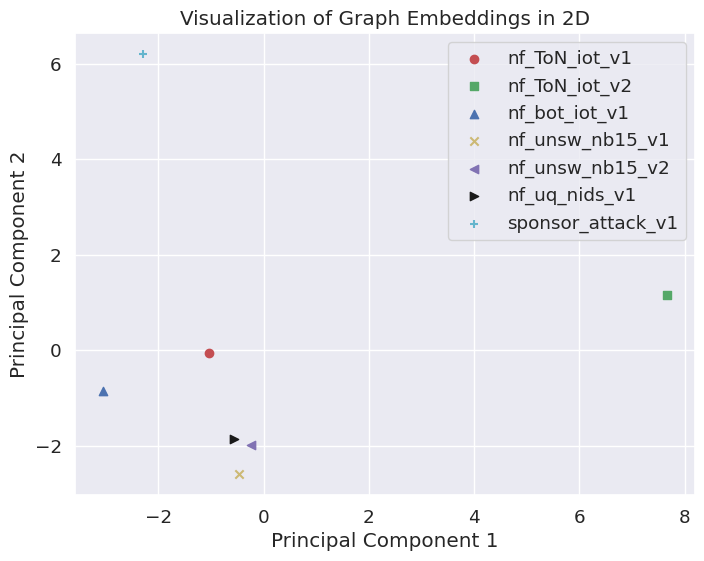

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Perform dimensionality reduction using PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings_df.values)

# Plot the embeddings on a 2D scatter plot
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b','y','m','k','c']  # Define colors for each graph
markers = ['o', 's', '^','x','<','>','+']  # Define markers for each graph

for i in range(7):
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], color=colors[i], marker=markers[i], label=graph_names[i])

plt.title('Visualization of Graph Embeddings in 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


**Five network dataset nf_bot_iot_v1, nf_uq_nids_v1, UNSW_NB15_v2, nf_UNSW_NB15_v1 and nf_ToN_iot_v1 looks closer in the embedding space. The sponsor attack v1 network data is missing with L7_protocol attribute and if that is available and may it would be near to other cluster of network data**

In [ ]:
embeddings_2d

array([[-1.04397983, -0.04940872],
       [ 7.65894304,  1.15382366],
       [-3.05219203, -0.85460204],
       [-0.46153764, -2.59751654],
       [-0.24277294, -1.98184999],
       [-0.5628243 , -1.86862266],
       [-2.29563629,  6.19817629]])

**Cosine Similarity on the graph2vec Embeddings**

In [ ]:
cosine_sim_matrix=cosine_similarity(embeddings_df)

In [ ]:
cosine_sim_matrix

array([[1.        , 0.87913726, 0.99156985, 0.99656315, 0.99871307,
        0.99974839, 0.93145656],
       [0.87913726, 1.        , 0.81345255, 0.87592607, 0.88943291,
        0.88098749, 0.82469328],
       [0.99156985, 0.81345255, 1.        , 0.98818291, 0.98753012,
        0.99112434, 0.92507123],
       [0.99656315, 0.87592607, 0.98818291, 1.        , 0.99892402,
        0.99798818, 0.89957112],
       [0.99871307, 0.88943291, 0.98753012, 0.99892402, 1.        ,
        0.99948889, 0.91600607],
       [0.99974839, 0.88098749, 0.99112434, 0.99798818, 0.99948889,
        1.        , 0.92465673],
       [0.93145656, 0.82469328, 0.92507123, 0.89957112, 0.91600607,
        0.92465673, 1.        ]])

In [ ]:
np.min(cosine_sim_matrix)

0.8134525530341369

**The minimum cosine similarity is 0.82 among the network data set**

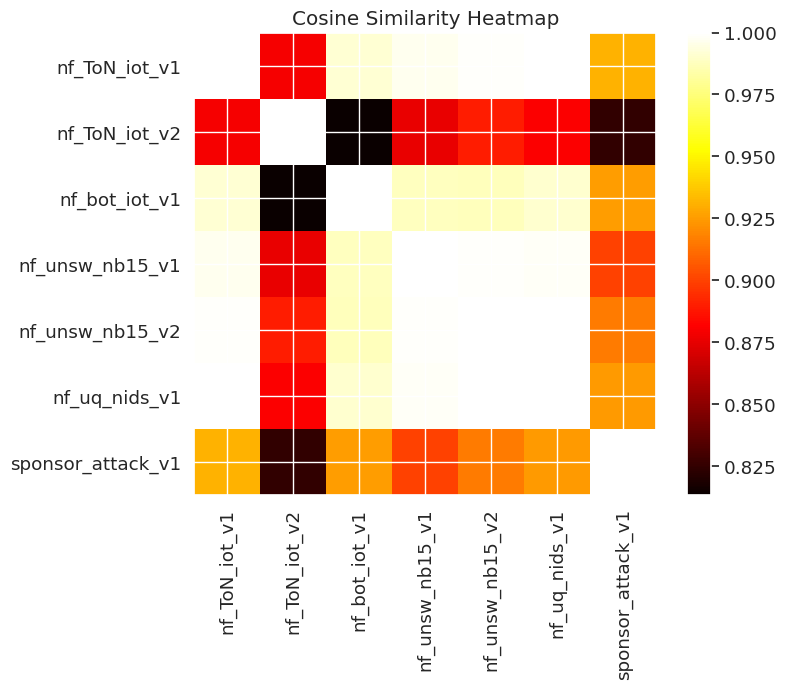

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(cosine_sim_matrix, cmap='hot')
plt.title('Cosine Similarity Heatmap')
plt.xticks(np.arange(len(graph_names)), graph_names, rotation=90)
plt.yticks(np.arange(len(graph_names)), graph_names)
plt.colorbar()
plt.show()

**Network "nf_ToN_iot_v1" is having cosine similarity of 1 with  nf_UNSW_NB15_v1,nf_uq_nids_v1, UNSW_NB15_v2.**

**Cosine Similarity with Sponsor Attack V1**

In [ ]:
cosine_sim_matrix[6]

array([0.93145656, 0.82469328, 0.92507123, 0.89957112, 0.91600607,
       0.92465673, 1.        ])

In [ ]:
graph_names

['nf_ToN_iot_v1',
 'nf_ToN_iot_v2',
 'nf_bot_iot_v1',
 'nf_unsw_nb15_v1',
 'nf_unsw_nb15_v2',
 'nf_uq_nids_v1',
 'sponsor_attack_v1']

Text(0.5, 1.0, 'Cosine Similarity against Sponsor Attack V1')

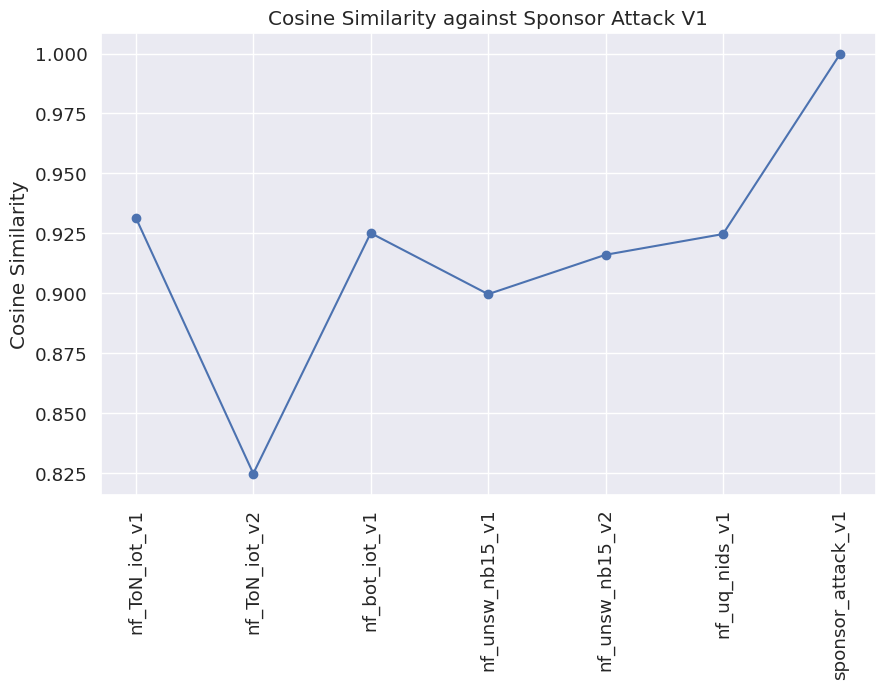

In [ ]:
# Create line plot
plt.figure(figsize=(10, 6))
plt.plot(graph_names, cosine_sim_matrix[6], marker='o', color='b', linestyle='-')

# Set x-axis labels
plt.xticks(rotation=90)


plt.ylabel('Cosine Similarity')
plt.title('Cosine Similarity against Sponsor Attack V1')

**Euclidean Distance**

In [ ]:
embeddings_df

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_118,x_119,x_120,x_121,x_122,x_123,x_124,x_125,x_126,x_127
0,-1.262755,-1.692751,-2.469743,2.368135,1.055262,0.437188,-2.634822,-1.387983,-2.649029,0.695912,...,1.116481,2.326316,2.445653,1.355691,-1.902282,2.341292,-2.983030,0.119191,-2.124245,0.086536
1,-0.655655,-2.396031,-1.484893,2.143172,0.813746,1.230547,-2.726920,-1.346170,-2.032865,0.994190,...,0.692969,2.725297,1.120100,-0.085325,-2.860503,0.900093,-3.354986,-0.213286,-2.086998,0.934372
2,-1.210509,-1.294707,-2.495999,2.180827,0.960218,0.139692,-2.338258,-1.182683,-2.436503,0.618458,...,1.141896,1.936459,2.530301,1.557268,-1.482212,2.498343,-2.518820,0.220361,-1.751351,-0.170166
3,-0.900044,-1.228448,-1.904021,1.900288,0.905692,0.492985,-1.973780,-1.050297,-2.100339,0.646838,...,1.036188,1.818024,2.123768,0.925365,-1.456530,2.037027,-2.539203,0.070261,-1.820841,0.204826
4,-0.934329,-1.325890,-1.933985,1.915760,0.870804,0.448905,-2.071280,-1.089413,-2.098941,0.628854,...,0.955269,1.860489,2.010260,0.939130,-1.529289,1.918984,-2.488100,0.066483,-1.753741,0.183393
5,-0.950036,-1.297880,-1.919993,1.860750,0.837649,0.379932,-2.036217,-1.063043,-2.059034,0.580923,...,0.914227,1.800410,1.942413,1.008998,-1.478355,1.865731,-2.360082,0.091590,-1.666074,0.097876
6,-1.707031,-2.297191,-2.936446,2.258171,0.537117,-0.572968,-3.345616,-1.699479,-2.448596,0.240583,...,0.168956,2.433457,1.325956,1.842623,-1.963898,1.243424,-1.634683,0.139676,-0.831436,-0.519277


In [ ]:
embeddigs_euc=embeddings_df.values

In [ ]:
import numpy as np

# Assuming you have embeddings for 7 networks with each embedding of size 128
embeddings = np.random.rand(7, 128)  # Replace this with your actual embeddings

# Calculate the Euclidean distance between each pair of embeddings
euclidean_distances = np.zeros((7, 7))

for i in range(7):
    for j in range(i+1, 7):
        euclidean_distances[i, j] = np.linalg.norm(embeddigs_euc[i] - embeddigs_euc[j])
        euclidean_distances[j, i] = euclidean_distances[i, j]

In [ ]:
euclidean_matrix=pd.DataFrame(euclidean_distances,columns=graph_names)
euclidean_matrix

,nf_ToN_iot_v1,nf_ToN_iot_v2,nf_bot_iot_v1,nf_unsw_nb15_v1,nf_unsw_nb15_v2,nf_uq_nids_v1,sponsor_attack_v1
0,0.000000,8.979269,2.460137,3.920361,3.714495,3.920509,7.058842
1,8.979269,0.000000,10.934938,9.014144,8.593710,8.909401,11.226051
2,2.460137,10.934938,0.000000,3.709932,3.711664,3.676138,7.399342
3,3.920361,9.014144,3.709932,0.000000,0.674887,0.936439,8.986213
4,3.714495,8.593710,3.711664,0.674887,0.000000,0.539186,8.433947
5,3.920509,8.909401,3.676138,0.936439,0.539186,0.000000,8.262235
6,7.058842,11.226051,7.399342,8.986213,8.433947,8.262235,0.000000


In [ ]:
euclidean_matrix['network type']=graph_names

In [ ]:
euclidean_matrix

,nf_ToN_iot_v1,nf_ToN_iot_v2,nf_bot_iot_v1,nf_unsw_nb15_v1,nf_unsw_nb15_v2,nf_uq_nids_v1,sponsor_attack_v1,network type
0,0.000000,8.979269,2.460137,3.920361,3.714495,3.920509,7.058842,nf_ToN_iot_v1
1,8.979269,0.000000,10.934938,9.014144,8.593710,8.909401,11.226051,nf_ToN_iot_v2
2,2.460137,10.934938,0.000000,3.709932,3.711664,3.676138,7.399342,nf_bot_iot_v1
3,3.920361,9.014144,3.709932,0.000000,0.674887,0.936439,8.986213,nf_unsw_nb15_v1
4,3.714495,8.593710,3.711664,0.674887,0.000000,0.539186,8.433947,nf_unsw_nb15_v2
5,3.920509,8.909401,3.676138,0.936439,0.539186,0.000000,8.262235,nf_uq_nids_v1
6,7.058842,11.226051,7.399342,8.986213,8.433947,8.262235,0.000000,sponsor_attack_v1


In [ ]:
cols = list(euclidean_matrix.columns)
cols = [cols[-1]] + cols[:-1]
euclidean_matrix = euclidean_matrix[cols]
euclidean_matrix.sort_values('nf_ToN_iot_v1')

,network type,nf_ToN_iot_v1,nf_ToN_iot_v2,nf_bot_iot_v1,nf_unsw_nb15_v1,nf_unsw_nb15_v2,nf_uq_nids_v1,sponsor_attack_v1
0,nf_ToN_iot_v1,0.000000,8.979269,2.460137,3.920361,3.714495,3.920509,7.058842
2,nf_bot_iot_v1,2.460137,10.934938,0.000000,3.709932,3.711664,3.676138,7.399342
4,nf_unsw_nb15_v2,3.714495,8.593710,3.711664,0.674887,0.000000,0.539186,8.433947
3,nf_unsw_nb15_v1,3.920361,9.014144,3.709932,0.000000,0.674887,0.936439,8.986213
5,nf_uq_nids_v1,3.920509,8.909401,3.676138,0.936439,0.539186,0.000000,8.262235
6,sponsor_attack_v1,7.058842,11.226051,7.399342,8.986213,8.433947,8.262235,0.000000
1,nf_ToN_iot_v2,8.979269,0.000000,10.934938,9.014144,8.593710,8.909401,11.226051


**The lowest distance with nf_ToN_iot_v1 are nf_unsw_nb15_v1, nf_unsw_nb15_v2 and nf_uq_nids_v1**

**Euclidean Distance with Sponsor Attack V1**

Text(0.5, 1.0, 'Euclidean Distance of Networks against Sponsor Attack V1')

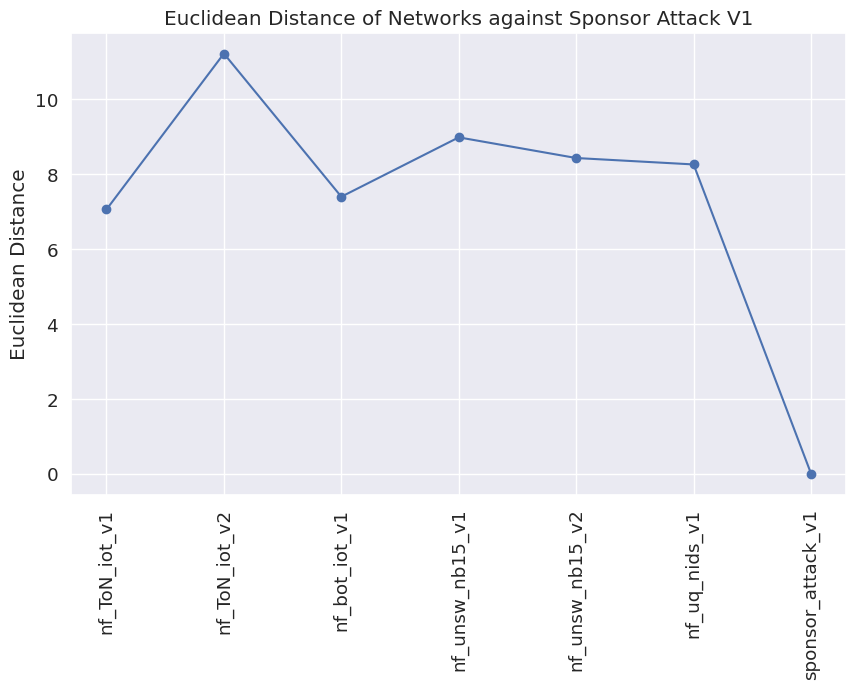

In [ ]:
# Create line plot
plt.figure(figsize=(10, 6))
plt.plot(graph_names, euclidean_matrix['sponsor_attack_v1'], marker='o', color='b', linestyle='-')

# Set x-axis labels
plt.xticks(rotation=90)


plt.ylabel('Euclidean Distance')
plt.title('Euclidean Distance of Networks against Sponsor Attack V1')

#Self Similarity Test

In [ ]:
df_nf_BoT_iot_v1=pd.read_parquet('/content/gdrive/MyDrive/csci-e-599a-2024-cybersecurity/data/parquet/netflow/ip_port/NF-BoT-IoT_chunks')

In [ ]:
raw_data=df_nf_BoT_iot_v1

In [ ]:
raw_data['src_id'] = raw_data['IPV4_SRC_ADDR'].astype(str) + ":" + raw_data['L4_SRC_PORT'].astype(str)
raw_data['dst_id'] = raw_data['IPV4_DST_ADDR'].astype(str) + ":" + raw_data['L4_DST_PORT'].astype(str)
raw_data.drop(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT','Label'], axis=1, inplace=True)

In [ ]:
raw_data.head()

,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,src_id,dst_id
__null_dask_index__,,,,,,,,,,
0,17,5.212,71,126,1,1,0,4294966,192.168.100.6:52670,192.168.100.1:53
1,6,0.000,217753000,199100,4521,4049,24,4176249,192.168.100.6:49160,192.168.100.149:4444
2,17,0.000,8508021,8918372,9086,9086,0,4175916,192.168.100.46:3456,192.168.100.5:80
3,6,7.000,8442138,9013406,9086,9086,0,4175916,192.168.100.3:80,192.168.100.55:8080
4,6,7.000,8374706,0,9086,0,0,4175916,192.168.100.46:80,192.168.100.5:80


In [ ]:
samples = [raw_data] + [raw_data.sample(frac=0.3, replace=True, random_state = seed) for seed in range(10)]

In [ ]:
samples[0].head()

,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,src_id,dst_id
__null_dask_index__,,,,,,,,,,
0,17,5.212,71,126,1,1,0,4294966,192.168.100.6:52670,192.168.100.1:53
1,6,0.000,217753000,199100,4521,4049,24,4176249,192.168.100.6:49160,192.168.100.149:4444
2,17,0.000,8508021,8918372,9086,9086,0,4175916,192.168.100.46:3456,192.168.100.5:80
3,6,7.000,8442138,9013406,9086,9086,0,4175916,192.168.100.3:80,192.168.100.55:8080
4,6,7.000,8374706,0,9086,0,0,4175916,192.168.100.46:80,192.168.100.5:80


In [ ]:
directory = 'testsimilarity'
os.makedirs(directory)

In [ ]:
pwd

'/content/graph2vec'

In [ ]:
def generate_embeddings(samples):
  for i in range(len(samples)):
    edges=[]
    for _, row in samples[i].iterrows():
      edge_list=[]
      edge_attr={}
      edge_list.append(row['src_id'])
      edge_list.append(row['dst_id'])

      edge_attr['PROTOCOL']=row['PROTOCOL']
      edge_attr['L7_PROTO']=row['L7_PROTO']
      edge_attr['IN_BYTES']=row['IN_BYTES']
      edge_attr['OUT_BYTES']=row['OUT_BYTES']
      edge_attr['IN_PKTS']=row['IN_PKTS']
      edge_attr['OUT_PKTS']=row['OUT_PKTS']
      edge_attr['TCP_FLAGS']=row['TCP_FLAGS']
      edge_attr['FLOW_DURATION_MILLISECONDS']=row['FLOW_DURATION_MILLISECONDS']
      edge_list.append(edge_attr)
      edges.append(edge_list)

    # Construct JSON object
    network_data = {
        'edges': edges
    }

    # Write JSON to file
    fileName='sample'+str(i)+'.json'
    with open('testsimilarity/'+fileName, 'w') as f:
      json.dump(network_data, f, indent=4)

  # Calculate Embeddings
  #!python src/graph2vec.py --input-path testsimilarity/ --output-path features/testsimilarity_embeddings.csv
  !python /content/gdrive/MyDrive/capstone-project/graph2vec/graph2vec.py --input-path testsimilarity/ --output-path features/testsimilarity_embeddings.csv


In [ ]:
samples = [raw_data] + [raw_data.sample(frac=0.3, replace=True, random_state = seed) for seed in range(10)]
simil= generate_embeddings(samples)


Feature extraction started.

100% 11/11 [00:03<00:00,  2.78it/s]

Optimization started.

/content/gdrive/MyDrive/capstone-project/graph2vec/graph2vec.py:104: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  out.append([identifier] + list(model.docvecs["g_"+identifier]))


In [ ]:
#Read the Embeddings Generated CSV File

In [ ]:
embeddings_df=pd.read_csv("features/testsimilarity_embeddings.csv")
embeddings_df.head()

,type,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,x_118,x_119,x_120,x_121,x_122,x_123,x_124,x_125,x_126,x_127
0,sample0,0.599229,-0.509250,-1.587024,1.257787,-0.289323,0.315955,-0.727822,-0.558749,-1.115365,...,0.271969,0.957426,2.135222,0.472274,0.449301,1.352655,-1.397387,0.734400,-0.678159,1.248530
1,sample1,-0.795327,-0.471464,-0.403670,0.942579,0.816124,0.265375,-0.482423,-0.975925,-0.742584,...,0.410547,1.152097,0.756713,-0.962666,-0.454127,0.673335,-1.847271,-0.270139,-2.025053,0.527249
2,sample10,-0.591701,-0.594590,-0.585272,0.788342,0.089393,0.001126,-1.314039,-0.572132,-1.777637,...,-0.202143,1.404267,0.367761,1.180625,-1.427383,-0.113416,-1.337982,0.175710,-1.314052,0.309410
3,sample2,-0.617390,-1.643017,-1.334371,1.333362,0.071387,-0.075172,-0.284651,0.052174,-0.934631,...,1.163854,1.444671,0.679575,0.288195,-1.035989,0.410663,-0.557141,0.460395,-0.275624,0.236967
4,sample3,-0.329776,-0.257507,-0.564282,0.864767,0.650292,0.711324,-0.877454,-0.066078,-0.341861,...,0.336903,-0.303829,0.133497,1.345387,-0.843997,0.416936,-0.864899,0.725451,-0.616506,-0.818652


In [ ]:
embeddings_df.drop(['type'], axis=1, inplace=True)

In [ ]:
simil=cosine_similarity(embeddings_df)

In [ ]:
type(simil)

numpy.ndarray

In [ ]:
def plot_pairwise_heatmap(simil: np.ndarray, add_mask:bool) -> plt:

  # Mask Upper triangular part
  mask = np.tril(np.ones_like(simil, dtype=bool))

  sns.set(font_scale=1.2)
  plt.figure(figsize=(8, 6))
  sns.heatmap(simil, mask = mask if add_mask else None , annot=True, cmap='coolwarm', fmt='.2f',
              xticklabels=[f"{i+1}" for i in range((simil.shape[0]))],
              yticklabels=[f"{i+1}" for i in range((simil.shape[1]))])
  plt.title('Pairwise Cosine Similarities')
  plt.xlabel('Subgraph')
  plt.ylabel('Subgraph')

  return plt

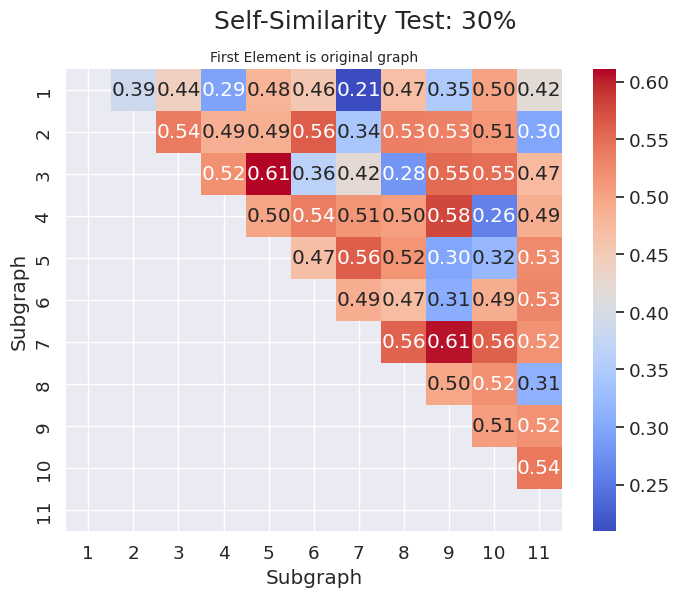

In [ ]:
plot = plot_pairwise_heatmap(simil, True)
plot.suptitle("Self-Similarity Test: 30%", fontsize=18)
plot.title("First Element is original graph", fontsize=10)
plot.show()

In [ ]:
#50% similarity Test

In [ ]:
samples = [raw_data] + [raw_data.sample(frac=0.5, replace=True, random_state = seed) for seed in range(10)]
simil = generate_embeddings(samples)


Feature extraction started.

100% 11/11 [00:05<00:00,  1.97it/s]

Optimization started.

/content/gdrive/MyDrive/capstone-project/graph2vec/graph2vec.py:104: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  out.append([identifier] + list(model.docvecs["g_"+identifier]))


In [ ]:
embeddings_df=pd.read_csv("features/testsimilarity_embeddings.csv")
embeddings_df.head()

,type,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,x_118,x_119,x_120,x_121,x_122,x_123,x_124,x_125,x_126,x_127
0,sample0,0.382229,-0.286346,-1.993269,1.639212,-0.579737,-0.363748,-1.138380,-0.780199,-1.781921,...,-0.076916,1.482492,2.730674,0.987093,-0.107742,1.502061,-1.892584,0.928843,-1.186814,1.389209
1,sample1,-0.899530,-1.138313,-1.000015,1.530004,0.665534,0.325971,-0.529721,-0.335952,-0.739719,...,1.257354,1.331391,0.085767,-0.890791,-0.699528,-0.007240,-1.865045,-0.104505,-1.314329,0.957046
2,sample10,-0.836930,-1.039277,-0.768958,0.840639,-0.010571,-0.129785,-1.422976,-0.453728,-1.668204,...,-0.147429,1.457363,-0.088623,1.664440,-1.627379,-0.480013,-0.856824,0.296912,-0.738625,-0.121568
3,sample2,-0.638279,-1.230639,-1.714688,1.167676,0.284820,-0.078627,-0.355484,0.284865,-0.762937,...,1.598876,0.786959,1.009091,1.122549,-0.290070,1.172503,-0.170037,0.447090,0.383727,-0.335741
4,sample3,-0.100148,-0.186420,-0.611027,1.000386,0.604375,0.895988,-0.885009,-0.078293,-0.347553,...,0.309674,-0.440335,0.495643,1.352444,-0.905501,0.683290,-0.947942,0.861261,-0.573222,-0.830873


In [ ]:
embeddings_df_50=embeddings_df.drop(['type'], axis=1)

In [ ]:
simil=cosine_similarity(embeddings_df_50)

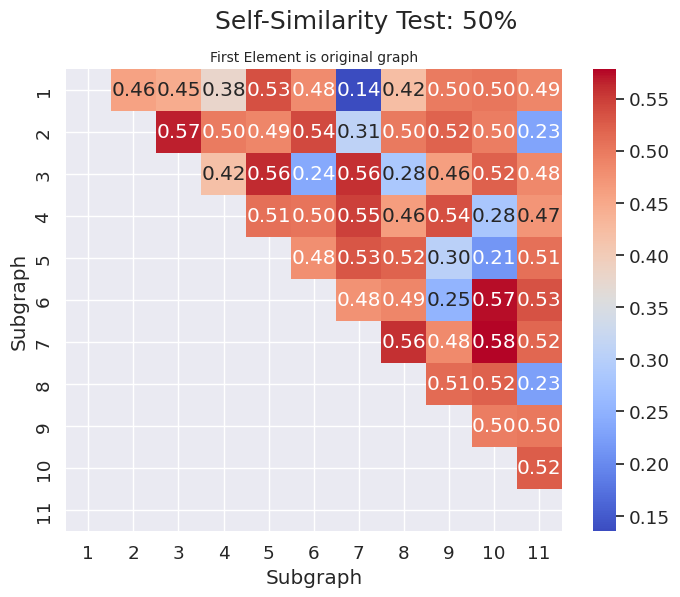

In [ ]:
plot = plot_pairwise_heatmap(simil, True)
plot.suptitle("Self-Similarity Test: 50%", fontsize=18)
plot.title("First Element is original graph", fontsize=10)
plot.show()

In [ ]:
embeddings_df['embedding_all_list'] = embeddings_df_50.apply(lambda row: row.tolist(), axis=1)

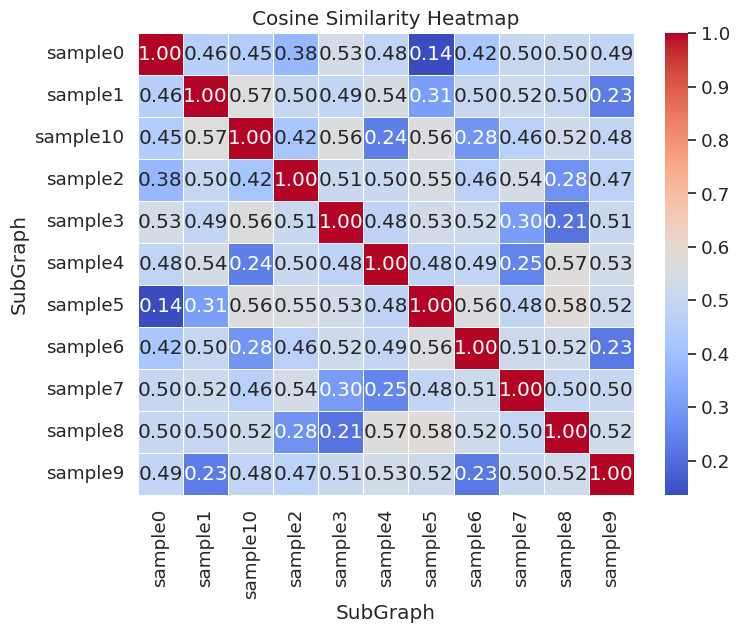

In [ ]:

# Extract embeddings
embeddings = np.array(embeddings_df['embedding_all_list'].tolist())

# Calculate cosine similarity
cos_sim_matrix = cosine_similarity(embeddings, embeddings)


# Create DataFrame from cosine similarity matrix
cos_sim_df = pd.DataFrame(cos_sim_matrix, columns=embeddings_df['type'], index=embeddings_df['type'])

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cos_sim_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Cosine Similarity Heatmap')
plt.xlabel('SubGraph')
plt.ylabel('SubGraph')
plt.show()

**Node Drop Test**

In [ ]:
%pwd

'/content/graph2vec'

In [ ]:
directory = 'nodedrop'
os.makedirs(directory)

In [ ]:
df_nf_BoT_iot_v1.head()

,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,src_id,dst_id
__null_dask_index__,,,,,,,,,,
0,17,5.212,71,126,1,1,0,4294966,192.168.100.6:52670,192.168.100.1:53
1,6,0.000,217753000,199100,4521,4049,24,4176249,192.168.100.6:49160,192.168.100.149:4444
2,17,0.000,8508021,8918372,9086,9086,0,4175916,192.168.100.46:3456,192.168.100.5:80
3,6,7.000,8442138,9013406,9086,9086,0,4175916,192.168.100.3:80,192.168.100.55:8080
4,6,7.000,8374706,0,9086,0,0,4175916,192.168.100.46:80,192.168.100.5:80


In [ ]:
def generate_embeddings_nodedrop(samples,fileName):

  features={}
  edges=[]
  for _,row in samples.iterrows():
    edge_list=[]
    edge_attr={}
    edge_list.append(row['src_id'])
    edge_list.append(row['dst_id'])

    edge_attr['PROTOCOL']=row['PROTOCOL']
    edge_attr['L7_PROTO']=row['L7_PROTO']
    edge_attr['IN_BYTES']=row['IN_BYTES']
    edge_attr['OUT_BYTES']=row['OUT_BYTES']
    edge_attr['IN_PKTS']=row['IN_PKTS']
    edge_attr['OUT_PKTS']=row['OUT_PKTS']
    edge_attr['TCP_FLAGS']=row['TCP_FLAGS']
    edge_attr['FLOW_DURATION_MILLISECONDS']=row['FLOW_DURATION_MILLISECONDS']
    edge_list.append(edge_attr)
    edges.append(edge_list)

  # Construct JSON object
  network_data = {
    'edges': edges
  }
  with open('nodedrop/'+fileName+'.json', 'w') as f:
    json.dump(network_data, f, indent=4)


In [ ]:
percentage_to_drop = np.arange(0.0, 1.0, 0.1)
for percentage_to_drop in percentage_to_drop:
    # Randomly select nodes to drop
    #print(percentage_to_drop)
    num_nodes_to_drop = int(len(df_nf_BoT_iot_v1) * percentage_to_drop)
    nodes_to_drop = np.random.choice(df_nf_BoT_iot_v1.index, size=num_nodes_to_drop, replace=False)

    # Drop nodes
    df_subset = df_nf_BoT_iot_v1.drop(nodes_to_drop)

    # Perform analysis or operations on the modified DataFrame
    #print(f"Iteration {i+1}: Number of nodes remaining: {len(df_subset)}")
    fileName='sample'+str(int(percentage_to_drop*100))

    generate_embeddings_nodedrop(df_subset,fileName)




In [ ]:
!python /content/gdrive/MyDrive/capstone-project/graph2vec/graph2vec.py --input-path nodedrop/ --output-path features/similaritytest_nodedrop_embed.csv



Feature extraction started.

100% 10/10 [00:03<00:00,  3.23it/s]

Optimization started.

/content/gdrive/MyDrive/capstone-project/graph2vec/graph2vec.py:104: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  out.append([identifier] + list(model.docvecs["g_"+identifier]))


In [ ]:
nodedrop_embeddings=pd.read_csv("features/similaritytest_nodedrop_embed.csv")
nodedrop_embeddings_df=nodedrop_embeddings
nodedrop_embeddings=nodedrop_embeddings.drop(['type'],axis=1)
nodedrop_embeddings['embedding_all_list'] = nodedrop_embeddings.apply(lambda row: row.tolist(), axis=1)

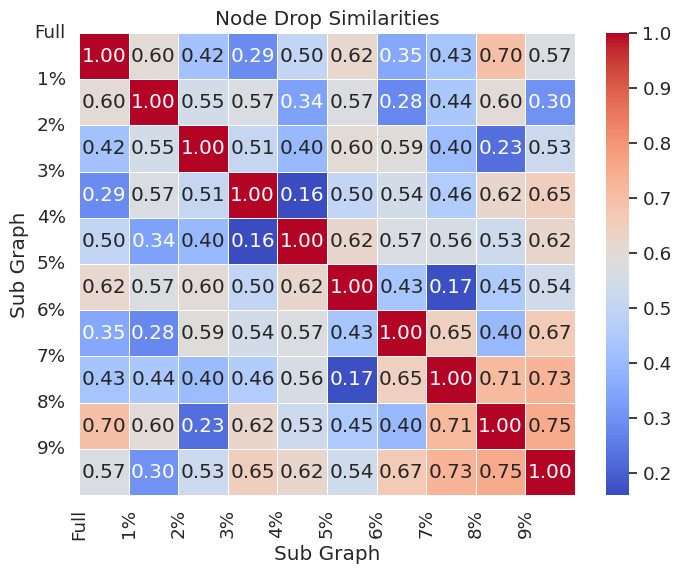

In [ ]:
# Extract embeddings
embeddings = np.array(nodedrop_embeddings['embedding_all_list'].tolist())

# Calculate cosine similarity
cos_sim_matrix = cosine_similarity(embeddings, embeddings)

# Create DataFrame from cosine similarity matrix
cos_sim_df = pd.DataFrame(cos_sim_matrix, columns=nodedrop_embeddings_df['type'], index=nodedrop_embeddings_df['type'])

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cos_sim_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Node Drop Similarities')
plt.xlabel('Sub Graph')
plt.ylabel('Sub Graph')
# Define tick positions and labels for x and y axes
ticks = np.arange(0,10, 1) / 100  # 0, 0.1, 0.2, ..., 1.0
labels = [f'{int(t*100)}%' for t in ticks]
labels[0]='Full'

# Set ticks and labels for x and y axes
plt.xticks(ticks=np.arange(0, 10), labels=labels)
plt.yticks(ticks=np.arange(0, 10), labels=labels)


plt.show()

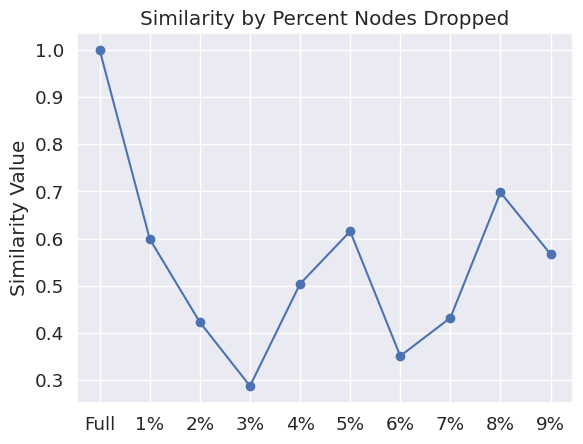

In [ ]:
labels=['Full']+[f'{int(t)}%' for t in list(range(1,10,1))]

# Plot the line graph
plt.plot(labels,list(cos_sim_df.iloc[0]), marker='o', linestyle='-')

# Add labels and title
plt.ylabel('Similarity Value')
plt.title('Similarity by Percent Nodes Dropped')

# Show the plot
plt.grid(True)
plt.show()